In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib import cm

In [2]:
# Inciso a
x=np.array([[1,1,1,1],[1,-1,1,-1],[1,-1,-1,1],[1,1,-1,-1]])
t=np.array([1,2,0.5,0.3])


In [3]:
# Inciso b
position=np.array([[1,1],[1,-1],[-1,-1],[1,-1]])

In [4]:
x

array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1, -1, -1,  1],
       [ 1,  1, -1, -1]])

In [26]:
# Inciso c
coefs=np.linalg.solve(x,t)

In [6]:
F=(lambda x,y:coefs[0] + coefs[1]*x + coefs[2]*y + coefs[3]*x*y)

In [28]:
# Inciso d
F(1,1)

1.0

In [29]:
F(-1,1)

2.0

In [30]:
F(-1,-1)

0.49999999999999994

In [31]:
F(1,-1)

0.2999999999999999

In [34]:
# Inciso e
w=np.linspace(-1,1,200)
p=np.linspace(-1,1,200)
T=np.array([])
for i in range(len(w)):
    T=np.append(T,F(w[i],p[i]))
    

(0.0, 2.0)

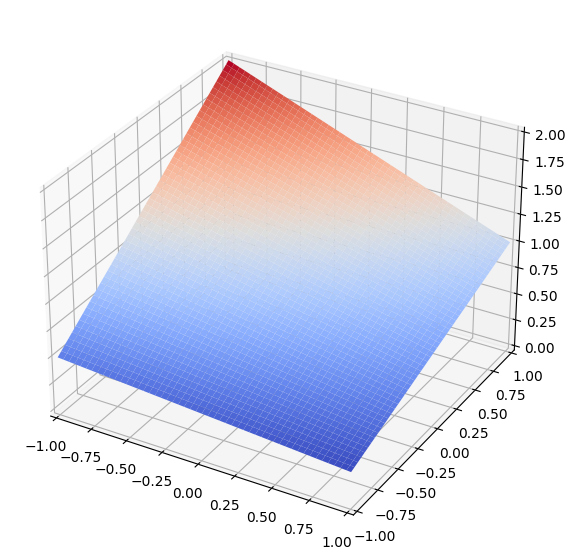

In [10]:
X,Y=np.meshgrid(w,p)
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1,projection='3d')
ax1.plot_surface(X,Y,F(X,Y),cmap=cm.coolwarm)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(0, 2)

In [33]:
# Inciso f
F(0,0.5)

1.225

In [36]:
# Inciso g
v0=np.array([[1],[1]])
v1=np.array([[-1],[1]])
v2=np.array([[-1],[-1]])
v3=np.array([[1],[-1]])
    

In [35]:
def Rotacion(theta):
    rot=np.array([[np.cos(theta),-1*np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    vr0=np.dot(rot,v0)
    vr1=np.dot(rot,v1)
    vr2=np.dot(rot,v2)
    vr3=np.dot(rot,v3)
    vrt=np.array([vr0,vr1,vr2,vr3])
    xn=np.array([[1,float(vrt[0][0]),float(vrt[0][1]),float(vrt[0][0]*vrt[0][1])],[1,float(vrt[1][0]),float(vrt[1][1]),float(vrt[1][0]*vrt[1][1])],[1,float(vrt[2][0]),float(vrt[2][1]),float(vrt[2][0]*vrt[2][1])],[1,float(vrt[3][0]),float(vrt[3][1]),float(vrt[3][0]*vrt[3][1])]])
    coefsn=np.linalg.solve(xn,t)
# Inciso h
    G=(lambda x,y:coefsn[0] + coefsn[1]*x + coefsn[2]*y + coefsn[3]*x*y)
    return G(0,0.5)

In [39]:
# Inciso i
theta=np.linspace(0,2*np.pi,200)
def MIN(theta):
    min_ = F(0,0.5)
    thetamin=0
    for i in range(len(theta)):
        if Rotacion(theta[i]) < min_:
            min_ = Rotacion(theta[i])
            thetamin=theta[i]
    return thetamin

In [40]:
MIN(theta)

2.652198823131082